In [1]:
import pandas as pd

# Replace 'your_file_name.xlsx' with the actual path to your Excel file
df = pd.read_excel("C:\\Users\\Aman Bisen\\Desktop\\Bitcoin_news.xlsx")

# Display the first 5 rows of the DataFrame
print(df.head(20))

                                                 guid  \
0   CBMihgFBVV95cUxPSjN3eTRPb2lDWW9ZamdlQ0tEbHpORD...   
1   CBMiXkFVX3lxTE5nQmd3dHY4Z2U4NERldVZDRUJfaU00Ni...   
2   CBMiqgFBVV95cUxQcUt6VUhPTGd6VGpzYlZRcTBEUFBBQT...   
3   CBMigwFBVV95cUxOX2c2a2txd0dLQVZuZEJCVk5ZMkRqOT...   
4   CBMiXkFVX3lxTE5OWkxYNVdXVHpaZVNqUFVEemtvNklaRG...   
5   CBMiigFBVV95cUxNY1pFenpLQzVSb1RIVXREdUNsTDBWcj...   
6   CBMioAFBVV95cUxOTzdwOENpRms1d2VtQXJWRENCM2hTX1...   
7   CBMi0AFBVV95cUxPVERNQTl0LVhPMFBjYV81ZXgtREhoTn...   
8   CBMitwFBVV95cUxNREp1OXF0LU9ibXVDXzVKZHJHZlhtZl...   
9   CBMiowFBVV95cUxQci1OQm13ZHlqMk9rMmVVNlRRQ0pMeX...   
10  CBMitwFBVV95cUxQV2lLdk1RMHVRdWgzWUw0YnRwSC1oaT...   
11  CBMi2gFBVV95cUxQS093Vl9WZjE0WUV5YW55aDFUR2xvaU...   
12  CBMijwFBVV95cUxPQy1zM0E1bVhSSU4yN0tFbzM5c2RiUj...   
13  CBMirwFBVV95cUxPTGFaN01iYzh5OXJIWHQ1Z0FVeE1qTE...   
14  CBMilgFBVV95cUxNR0JGdEw2QUY2aXU4d3FMMzdUa2poTn...   
15  CBMilwFBVV95cUxPNXhkR0Z1X0xfWUYzaUJQb3VNREF2ek...   
16  CBMigwFBVV95cUxOREMwd1BBaTJ

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def preprocess_reviews_optimized(file_path, title_column_name, output_file_name='preprocessed_reviews_optimized.xlsx'):
    """
    Imports an Excel file and efficiently preprocesses a specified title column using vectorized operations.

    Preprocessing steps:
    1. Handle missing values.
    2. Convert title to lowercase.
    3. Tokenize title.
    4. Remove special characters.
    5. Remove stopwords.

    Args:
        file_path (str): The path to the input Excel file.
        title_column_name (str): The name of the column containing the title.
        output_file_name (str): The name for the output Excel file.
    """
    try:
        # Download necessary NLTK data if not present
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)

        # 1. Import the Excel file
        df = pd.read_excel(file_path)
        print(f"Original DataFrame loaded. Shape: {df.shape}")

        if title_column_name not in df.columns:
            print(f"Error: Column '{title_column_name}' not found.")
            return

        # 2. Handle missing values and ensure string type
        df.dropna(subset=[title_column_name], inplace=True)
        df['original_title'] = df[title_column_name].astype(str)
        print(f"DataFrame shape after handling missing values: {df.shape}")

        # --- Vectorized Preprocessing using .apply() ---

        # 3. Lowercasing
        df['title_lowercase'] = df['original_title'].apply(lambda x: x.lower())

        # 4. Remove special characters
        df['title_no_special_chars'] = df['title_lowercase'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

        # 5. Tokenization
        df['title_tokenized'] = df['title_no_special_chars'].apply(word_tokenize)

        # 6. Remove stopwords
        stop_words = set(stopwords.words('english'))
        df['title_no_stopwords'] = df['title_tokenized'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

        # For saving to Excel, it's often better to join token lists back into strings
        df['title_tokenized_str'] = df['title_tokenized'].apply(' '.join)
        df['title_no_stopwords_str'] = df['title_no_stopwords'].apply(' '.join)

        # Reorder columns for clarity
        final_columns = [col for col in df.columns if col.startswith('title_') or col in ['original_title']]
        other_columns = [col for col in df.columns if col not in final_columns and col != title_column_name]
        df = df[other_columns + ['original_title', 'title_lowercase', 'title_no_special_chars', 'title_tokenized_str', 'title_no_stopwords_str']]

        # Save the preprocessed DataFrame
        df.to_excel(output_file_name, index=False)
        print(f"\nPreprocessing complete! Updated data saved to '{output_file_name}'.")
        print("Here are the first 5 rows of the preprocessed data:")
        print(df.head())

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- How to Use ---
input_excel_file = "C:\\Users\\Aman Bisen\\Desktop\\Bitcoin_news.xlsx"
title_column_name = 'title'  # This MUST match the column name in your Excel file
output_excel_file = 'bitcoin_13.xlsx'

# Run the optimized function
preprocess_reviews_optimized(input_excel_file, title_column_name, output_excel_file)


Original DataFrame loaded. Shape: (100, 9)
DataFrame shape after handling missing values: (100, 10)

Preprocessing complete! Updated data saved to 'bitcoin_13.xlsx'.
Here are the first 5 rows of the preprocessed data:
                                                guid  \
0  CBMihgFBVV95cUxPSjN3eTRPb2lDWW9ZamdlQ0tEbHpORD...   
1  CBMiXkFVX3lxTE5nQmd3dHY4Z2U4NERldVZDRUJfaU00Ni...   
2  CBMiqgFBVV95cUxQcUt6VUhPTGd6VGpzYlZRcTBEUFBBQT...   
3  CBMigwFBVV95cUxOX2c2a2txd0dLQVZuZEJCVk5ZMkRqOT...   
4  CBMiXkFVX3lxTE5OWkxYNVdXVHpaZVNqUFVEemtvNklaRG...   

                                               image  \
0  https://image.cnbcfm.com/api/v1/image/10819990...   
1  https://img.bgstatic.com/video/open_graph_new.png   
2  https://cdn.sanity.io/images/s3y3vcno/producti...   
3  https://blogger.googleusercontent.com/img/b/R2...   
4  https://img.bgstatic.com/video/open_graph_new.png   

                                                link  \
0  https://www.cnbc.com/2025/09/19/bitcoin-coinba...

In [21]:
import pandas as pd
from textblob import TextBlob

# Load your preprocessed file
# Make sure it has the column "title_no_stopwords_str" (from your previous preprocessing step)
df = pd.read_excel("bitcoin_13.xlsx")

# Rename for easier reference (optional)
df = df.rename(columns={'title_no_stopwords_str': 'stopwords_removed_title'})

# Perform sentiment analysis (polarity score between -1 and 1)
df['sentiment_score'] = df['stopwords_removed_title'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

# Categorize sentiment
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Save to a new Excel file
df.to_excel("sentiment_analysis_results.xlsx", index=False)

print("✅ Sentiment analysis complete. File 'sentiment_analysis_results.xlsx' has been created.")
print(df[['stopwords_removed_title', 'sentiment_score', 'sentiment_category']].head())


✅ Sentiment analysis complete. File 'sentiment_analysis_results.xlsx' has been created.
                             stopwords_removed_title  sentiment_score  \
0  kevin durant access restored coinbase bitcoin ...              0.0   
1  senate crypto bill takes proinnovation stand o...              0.0   
2  bitcoin btc news michigans stalled reserve bil...              0.0   
3  20 popular npm packages 2 billion weekly downl...              0.6   
4  eu imposes crypto sanctions block russian evas...              0.0   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3           Positive  
4            Neutral  


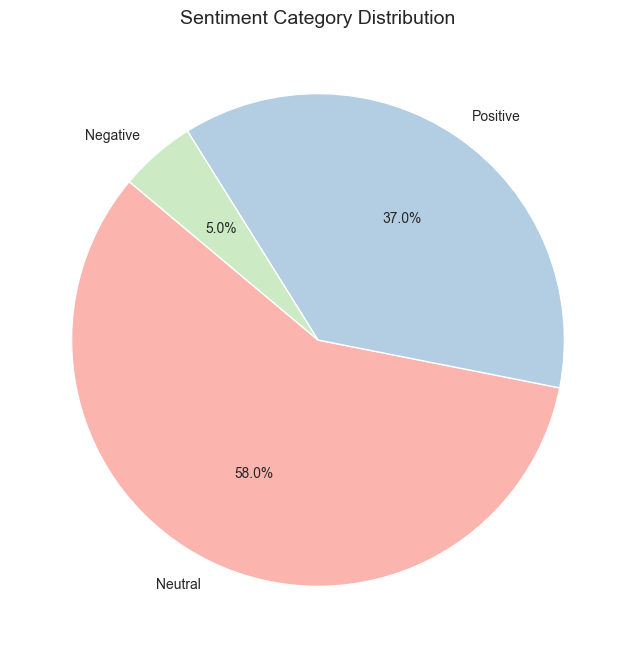

In [22]:
# Ensure the column name exists
if "sentiment_category" in df.columns:
    # Count values
    sentiment_counts = df["sentiment_category"].value_counts()

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Pastel1.colors  # pastel colors
    )

    plt.title("Sentiment Category Distribution", fontsize=14)
    plt.ylabel("")  # cleaner look
    plt.show()
else:
    print("⚠️ Column 'sentiment_category' not found in DataFrame.")

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: PLEASE VERIFY THESE VARIABLES ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = 'bitcoin_13.xlsx'

# This MUST be the exact name of the column with cleaned text.
# Check your Excel file for the correct name. Common names are 'text_no_stopwords_str' or 'review_no_stopwords'.
column_to_analyze = 'title_no_stopwords_str'

# The number of topics you want to find.
num_topics = 5


def display_topics(model, feature_names, num_top_words):
    """A helper function to print the topics in a readable format."""
    for topic_idx, topic in enumerate(model.components_):
        # topic.argsort() returns the indices that would sort the array.
        # [:-num_top_words - 1:-1] slices this to get the indices of the top words.
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_word_indices]
        print(f"Topic #{topic_idx}: {' '.join(top_words)}")


# --- Step 2: Run the Topic Modeling ---
try:
    # Load the data
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # --- Data Validation ---
    # 1. Check if the column actually exists
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")

    # 2. Handle missing values and ensure data is string type
    df.dropna(subset=[column_to_analyze], inplace=True)
    df[column_to_analyze] = df[column_to_analyze].astype(str)

    # 3. Check if we have any data left to analyze
    if df.empty:
        raise ValueError("The DataFrame is empty after removing rows with no text. Cannot perform topic modeling.")

    # Isolate the text data for modeling
    text_data = df[column_to_analyze]
    print(f"Performing topic modeling on {len(text_data)} reviews.")

    # --- Vectorize the Text (Convert text to numbers) ---
    # This step creates the vocabulary and the document-term matrix.
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    
    # We wrap this in a separate try-except to catch a specific common error
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    except ValueError as ve:
        print(f"--- ERROR during Vectorization ---")
        print(f"{ve}")
        print("\nThis often means that after filtering, no words were left in the vocabulary.")
        print("TRY THIS: Lower the 'min_df' value in the TfidfVectorizer (e.g., from 5 to 2) and run again.")
        # We exit here if vectorization fails
        exit()

    # --- Apply NMF Model ---
    print(f"\nFitting NMF model to find {num_topics} topics...")
    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)

    # --- Display the Results ---
    print("\n--- Discovered Topics ---")
    # Display the top 10 words for each topic
    display_topics(nmf_model, tfidf_feature_names, 10)


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
    print("TROUBLESHOOTING: Check that the file name is spelled correctly and is in the same folder as your notebook.")

except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("TROUBLESHOOTING: Check that the 'column_to_analyze' variable at the top of the script exactly matches a column name in your Excel file.")
    print("\nHere are the actual column names in your file:")
    print(df.columns.tolist())

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'bitcoin_13.xlsx'. Shape: (100, 13)
Performing topic modeling on 100 reviews.

Fitting NMF model to find 5 topics...

--- Discovered Topics ---
Topic #0: bitcoin price fed market kevin durant money hits coinbase rally
Topic #1: price prediction good investment 2030 20252030 2025 xrp market money
Topic #2: crypto reserve new years rally market money news trump price
Topic #3: trump statue holding bitcoin fed xrp market years reserve rally
Topic #4: btc xrp reserve news hits rally price new fed years


Successfully loaded 'bitcoin_13.xlsx'.
Running topic modeling...
Topic modeling complete. Generating charts...


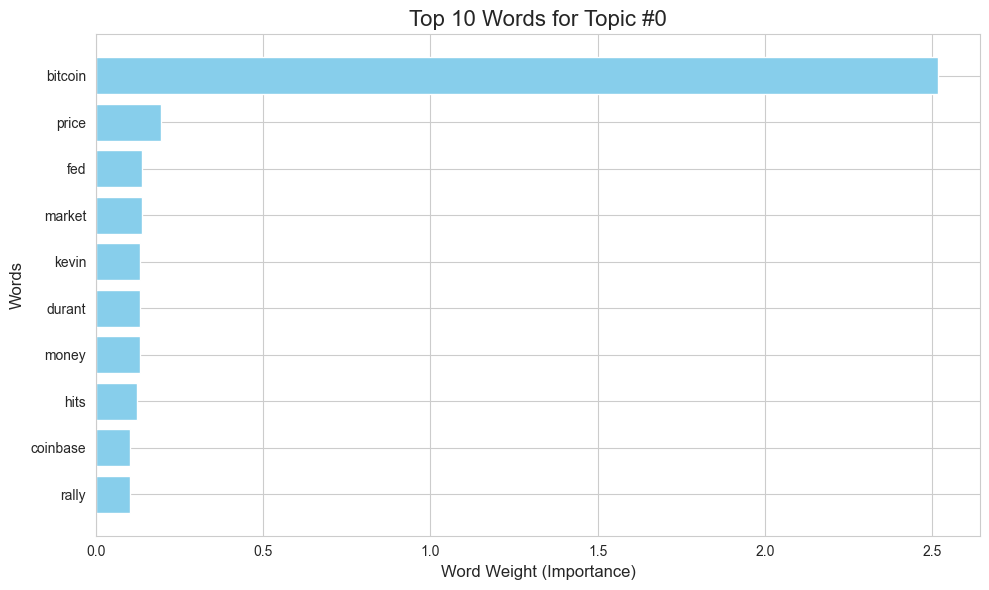

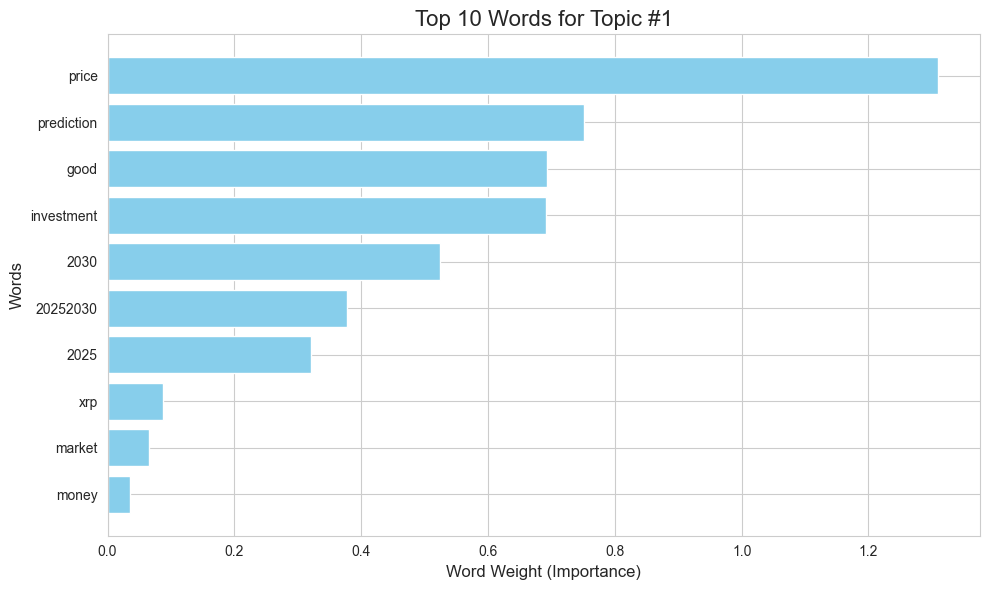

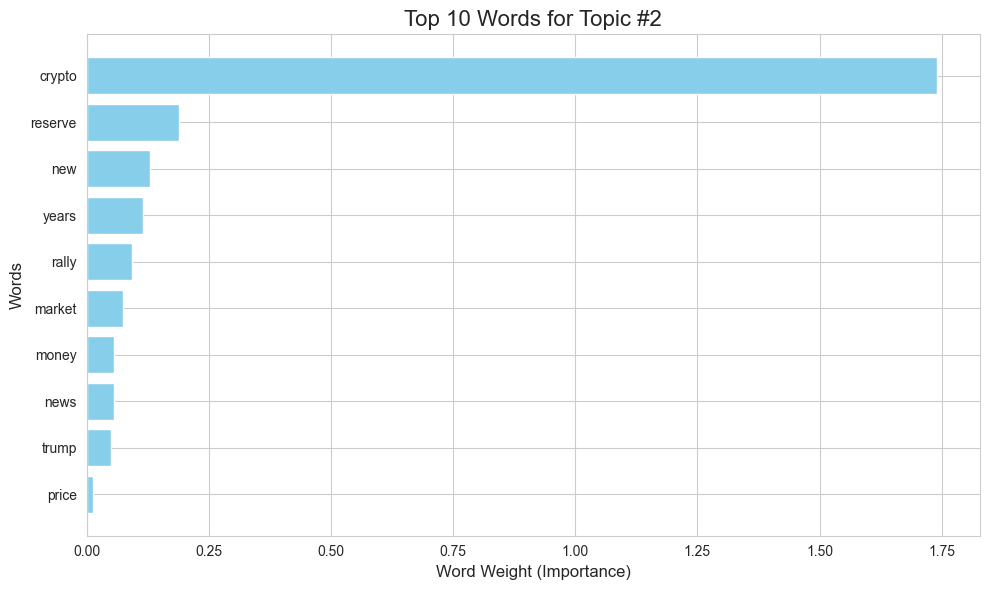

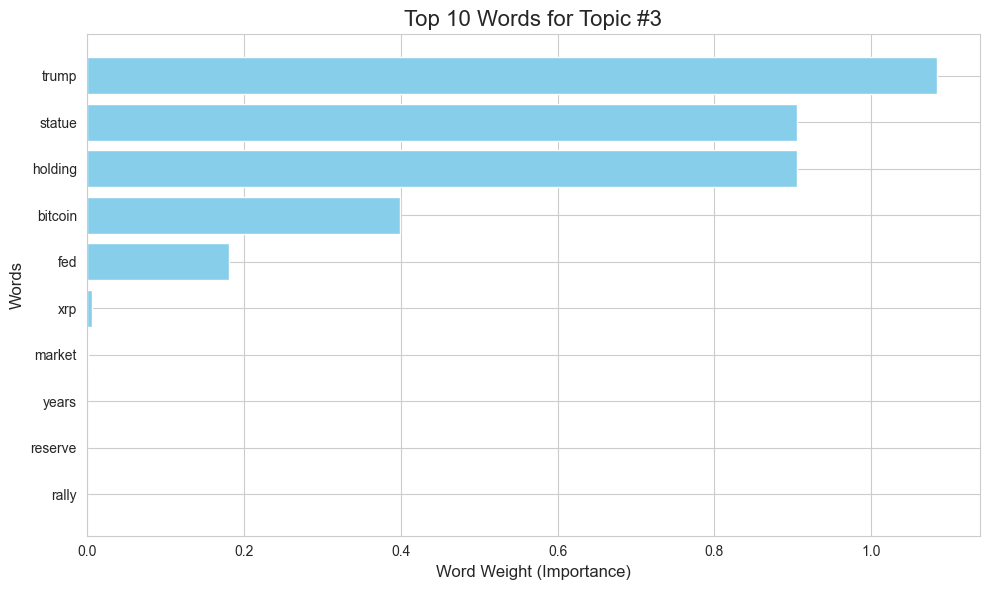

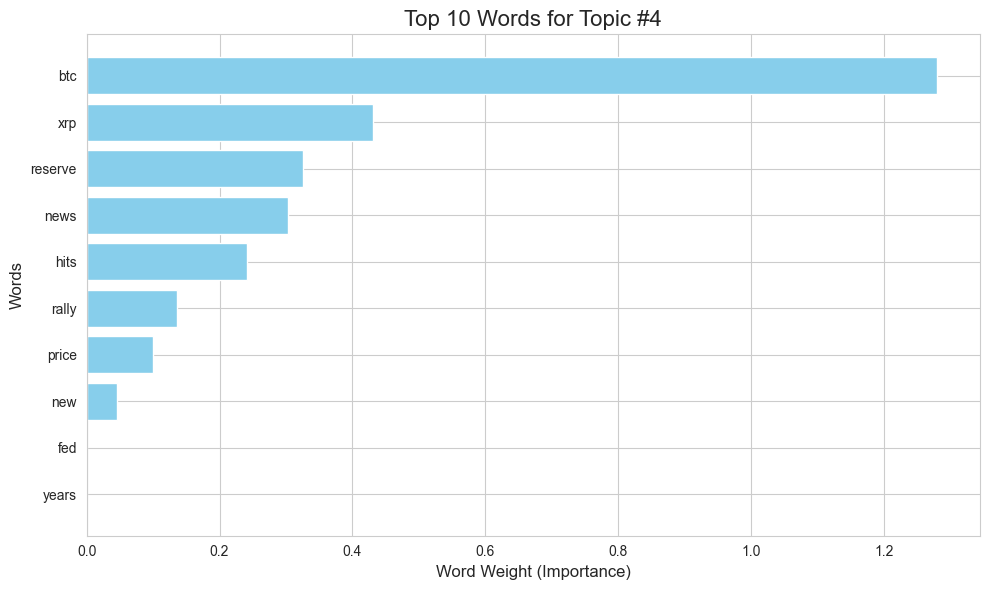

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Configuration ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = 'bitcoin_13.xlsx'

# This MUST be the exact name of the column with cleaned text.
column_to_analyze = 'title_no_stopwords_str'

# The number of topics and top words to display in the charts.
num_topics = 5
num_top_words = 10


try:
    # --- Step 2: Load and Prepare Data ---
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'.")

    # Validate and clean the data
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")
    df.dropna(subset=[column_to_analyze], inplace=True)
    text_data = df[column_to_analyze].astype(str)
    if text_data.empty:
        raise ValueError("The text data is empty after cleaning. Cannot proceed.")

    # --- Step 3: Vectorize and Run NMF (same as before) ---
    print("Running topic modeling...")
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)
    print("Topic modeling complete. Generating charts...")

    # --- Step 4: Generate a Bar Chart for Each Topic ---
    for topic_idx, topic in enumerate(nmf_model.components_):
        # Get the indices of the top words for this topic
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]

        # Get the top words and their corresponding weights
        top_words = [tfidf_feature_names[i] for i in top_word_indices]
        top_weights = [topic[i] for i in top_word_indices]

        # --- Create the plot ---
        plt.figure(figsize=(10, 6)) # Set the figure size
        
        # Create a horizontal bar chart
        plt.barh(top_words, top_weights, color='skyblue')
        
        # Invert the y-axis so the most important word is at the top
        plt.gca().invert_yaxis()

        # Add titles and labels for clarity
        plt.title(f'Top {num_top_words} Words for Topic #{topic_idx}', fontsize=16)
        plt.xlabel('Word Weight (Importance)', fontsize=12)
        plt.ylabel('Words', fontsize=12)
        
        # Ensure the layout is tight so labels don't get cut off
        plt.tight_layout()
        
        # Display the plot
        plt.show()


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("\nHere are the actual column names in your file:")
    print(pd.read_excel(input_file_name).columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'bitcoin_13.xlsx'.
Running topic modeling...
Topic modeling complete. Generating word clouds...


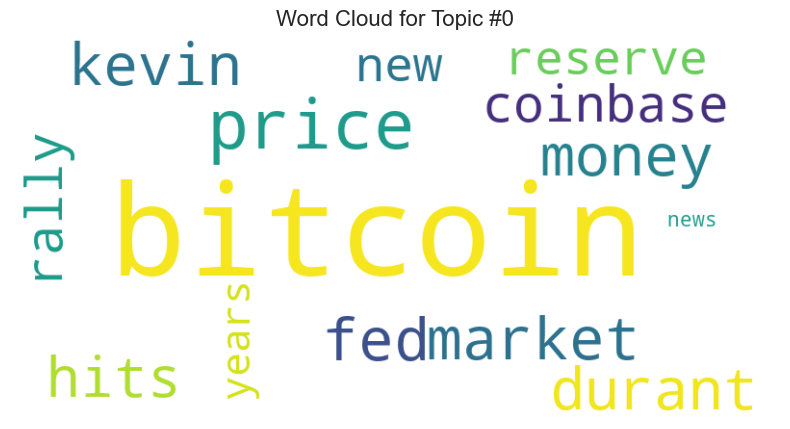

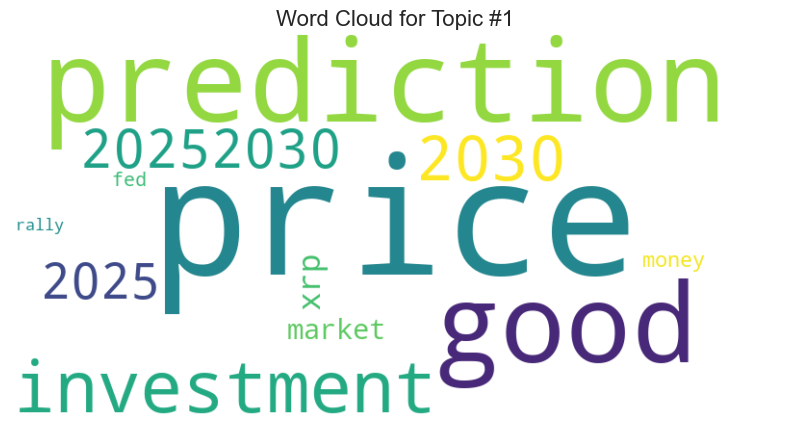

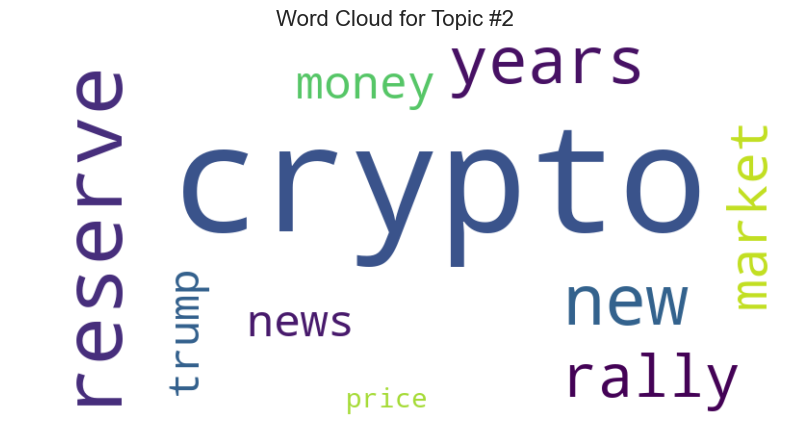

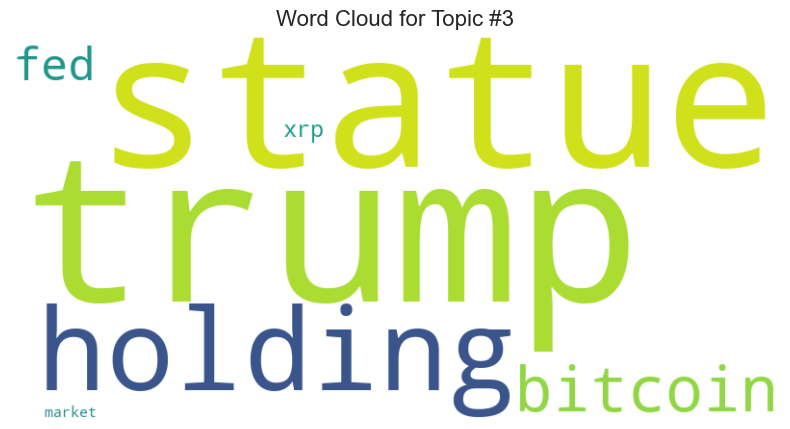

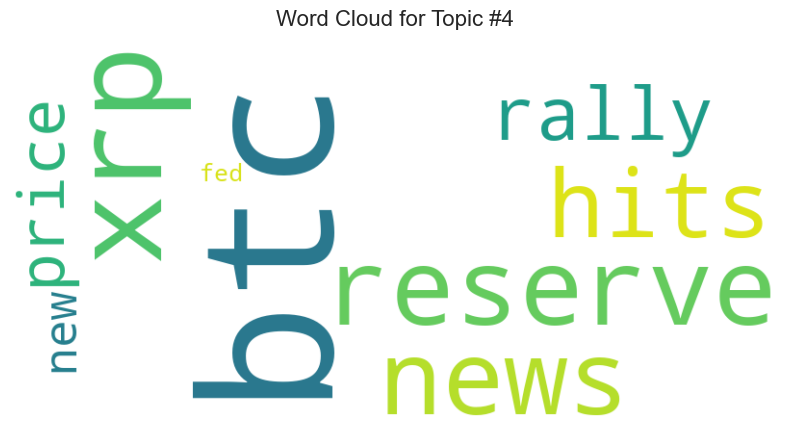

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Step 1: Configuration ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = 'bitcoin_13.xlsx'

# This MUST be the exact name of the column with cleaned text.
column_to_analyze = 'title_no_stopwords_str'

# The number of topics you want to find.
num_topics = 5


try:
    # --- Step 2: Load and Prepare Data ---
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'.")

    # Validate and clean the data
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")
    df.dropna(subset=[column_to_analyze], inplace=True)
    text_data = df[column_to_analyze].astype(str)
    if text_data.empty:
        raise ValueError("The text data is empty after cleaning. Cannot proceed.")

    # --- Step 3: Vectorize and Run NMF (same as before) ---
    print("Running topic modeling...")
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)
    print("Topic modeling complete. Generating word clouds...")

    # --- Step 4: Generate a Word Cloud for Each Topic ---

    # Get the vocabulary (list of words) from the vectorizer
    words = tfidf_vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(nmf_model.components_):
        # Create a dictionary of words and their weights for the current topic
        # The WordCloud object expects frequencies, so we'll use the NMF component weights
        topic_words = {words[i]: topic[i] for i in topic.argsort()[:-51:-1]} # Get top 50 words

        # Create the WordCloud object
        wordcloud = WordCloud(width=800,
                              height=400,
                              background_color='white',
                              colormap='viridis').generate_from_frequencies(topic_words)

        # --- Plot the Word Cloud ---
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Topic #{topic_idx}', fontsize=16)
        plt.axis('off') # Hide the axes
        plt.show()


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("\nHere are the actual column names in your file:")
    print(pd.read_excel(input_file_name).columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [41]:
import pandas as pd
from collections import Counter
import re

# --- Load your data ---
df = pd.read_excel("bitcoin_13.xlsx")  # Replace with your file

# Ensure the column exists
text_column = "title_no_stopwords_str"
if text_column not in df.columns:
    raise KeyError(f"Column '{text_column}' not found. Available columns: {df.columns.tolist()}")

# Combine all text into a single list of words
all_text = ' '.join(df[text_column].dropna().astype(str))
all_words = all_text.split()  # Split into individual words

# ------------------- Bigrams -------------------
bigrams_list = [tuple(all_words[i:i+2]) for i in range(len(all_words)-1)]
bigram_freq = Counter(bigrams_list)

print("=== Top 20 Bigrams ===")
for bg, freq in bigram_freq.most_common(20):
    print(f"{' '.join(bg)}: {freq}")

# ------------------- Trigrams -------------------
trigrams_list = [tuple(all_words[i:i+3]) for i in range(len(all_words)-2)]
trigram_freq = Counter(trigrams_list)

print("\n=== Top 20 Trigrams ===")
for tg, freq in trigram_freq.most_common(20):
    print(f"{' '.join(tg)}: {freq}")


=== Top 20 Bigrams ===
price prediction: 13
good investment: 10
bitcoin price: 9
kevin durant: 6
holding bitcoin: 6
prediction 20252030: 5
2025 2030: 5
us capitol: 4
nba star: 4
star kevin: 4
bitcoin reserve: 4
coinbase bitcoin: 3
bitcoin account: 3
trump statue: 3
statue holding: 3
bitcoin could: 3
fed rate: 3
price today: 3
michael saylor: 3
trump holding: 3

=== Top 20 Trigrams ===
price prediction 20252030: 5
nba star kevin: 4
star kevin durant: 4
coinbase bitcoin account: 3
trump statue holding: 3
statue holding bitcoin: 3
trump holding bitcoin: 3
price prediction 2023: 3
prediction 2023 2030: 3
price prediction 2025: 3
prediction 2025 2030: 3
holding bitcoin appears: 2
bitcoin appears us: 2
appears us capitol: 2
us capitol bitcoin: 2
kevin durant cant: 2
durant cant unlock: 2
cant unlock coinbase: 2
unlock coinbase bitcoin: 2
bitcoin account agent: 2
